In [1]:
!pip install nltk

In [2]:
import string
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
import GetOldTweets3 as got #from this library we scrap data from twitter without any tools.

def get_tweets(keyword,start,end,mxm):
    tweetCriteria=got.manager.TweetCriteria().setQuerySearch(keyword).setSince(start).setUntil(end).setMaxTweets(mxm)
    #Now we need to create a list where we will store all the tweets.
    tweets= got.manager.TweetManager.getTweets(tweetCriteria)
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [4]:
# We are taking the tweets which has been posted before the outbreak of corona virus in India as analysing the tweets.


In [5]:
tweet_before= get_tweets('corona virus', '2020-01-20','2020-02-28',500)

In [6]:
tweet_before

[['California Is Monitoring at Least 8,400 People for Coronavirus, Governor Says '],
 ['【Responses to New Coronavirus Infections】 http://systemtoyo.jugem.jp/?eid=55 #jugem_blog'],
 ['Just heard that all statements about the Coronavirus are going to be screened by the administration. So starts what trumpp wants to do ... control information to the public. Wants his own propaganda'],
 ['#Coronavirus #COVID19 It’s going global @TheEconomist https://twitter.com/Finanzas_Times/status/1227034596400881664'],
 ['Nun wird sich die völlige Unfähigkeit Merkels angesichts der Flüchtlingsströme, des Coronavirus, der bevorstehenden Rezession u.v.w. offenbaren. Wer dann glaubt, auf linksgrünen Sozialismus setzen zu müssen, besiegelt die totale deutsche Krise vollends.'],
 ['Pacientes sin seguridad social deberán ser atendidos por hospitales estatales en caso de resultar infectados por #coronavirus; #IMSS e #ISSSTE afirmaron que tienen capacidad de atención en sus sistemas.'],
 ['Coronavirus and clima

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:

text_before=''
for i in range(0,len(tweet_before)):
    text_before=text_before+'. '+tweet_before[i][0]
lower=text_before.lower()

cleaned_text=lower.translate(str.maketrans('','',string.punctuation))

from nltk.tokenize import word_tokenize
tokens=word_tokenize(cleaned_text,'english')

In [9]:
len(tokens)

9978

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords

In [12]:
stop_words=stopwords.words('english')
stop_words.remove('nor')
stop_words.remove('no')
stop_words.remove('not')

In [13]:
words=[word for word in tokens if word not in stop_words]

In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
from nltk.stem import WordNetLemmatizer

In [16]:
lemma=[(WordNetLemmatizer().lemmatize(word)) for word in words]

In [17]:
len(lemma)

7566

In [18]:
clear_line=''
emotion_list=[]
with open('C:/Users/ASUS/NLP/sentiment_analysis_all_files/emotions.txt','r') as file:
    for line in file:
        clear_line=line.replace("\n",'').replace(" ","").replace(","," ").replace("'","").strip()
        word,emotion=clear_line.split(':')
        if word in lemma:
            emotion_list.append(emotion)
            
w=Counter(emotion_list)
print(w)

Counter({'sad': 4, 'free': 3, 'fearful': 3, 'attracted': 2, 'average': 2, 'surprise': 2, 'powerless': 2, 'happy': 2, 'independent': 2, 'fearless': 1, 'esteemed': 1, 'adequate': 1, 'alone': 1})


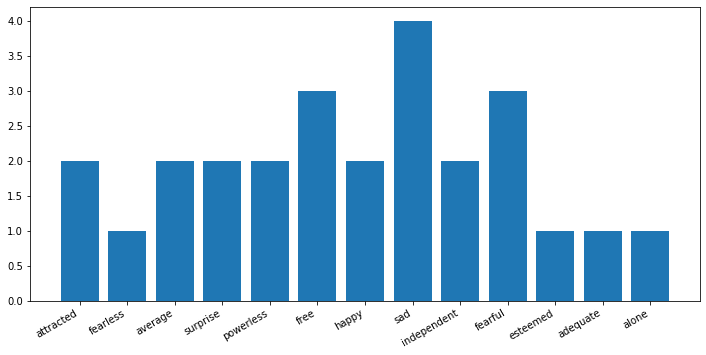

In [19]:
fig,ax=plt.subplots(figsize=(12,6))
ax.bar(w.keys(),w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

In [20]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()
sia.polarity_scores(cleaned_text)

{'neg': 0.096, 'neu': 0.839, 'pos': 0.064, 'compound': -0.9999}

# Now let us check the sentiment analysis after the outbreak of Corona Virus

In [22]:
corona_after=get_tweets('corona virus','2020-03-25','2020-04-30',500)

In [23]:
text_after=''
for i in range(0,len(corona_after)):
    text_after=text_after+'. '+corona_after[i][0]
lower_after=text_after.lower()

cleaned_after=lower_after.translate(str.maketrans('','',string.punctuation))

In [24]:
words_after=word_tokenize(cleaned_after,'english')

In [25]:
len(words_after)

11365

In [26]:
words_as=[word for word in words_after if word not in stop_words]

In [27]:
len(words_as)

9047

In [28]:
lemma_a=[WordNetLemmatizer().lemmatize(word) for word in words_as]


In [29]:
len(lemma_a)

9047

In [30]:
clean_line=''
emotion_list=[]
with open('C:/Users/ASUS/NLP/sentiment_analysis_all_files/emotions.txt','r') as file:
    for line in file:
        clean_line=line.replace("\n",'').replace(" ","").replace(","," ").replace("'","").strip()
        word,emotion=clean_line.split(':')
        if word in lemma_a:
            emotion_list.append(emotion)
            
w1=Counter(emotion_list)

In [31]:
print(w1)

Counter({'sad': 5, 'happy': 3, 'attracted': 2, 'free': 2, 'angry': 2, 'loved': 2, 'average': 1, 'powerless': 1, 'alone': 1, 'lost': 1, 'attached': 1, 'obsessed': 1, 'fearful': 1, 'independent': 1, 'entitled': 1})


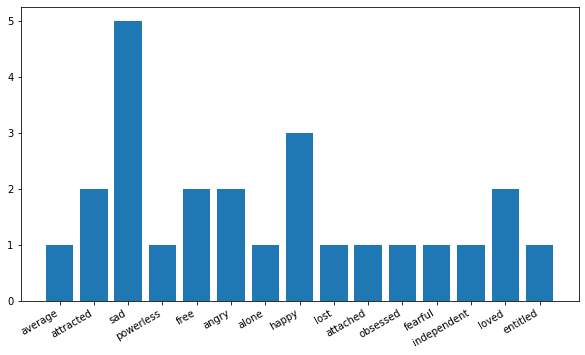

In [32]:
fig,ax=plt.subplots(figsize=(10,6))
ax.bar(w1.keys(),w1.values())
fig.autofmt_xdate()
plt.show()

In [33]:
sia=SentimentIntensityAnalyzer()
sia.polarity_scores(cleaned_after) 

{'neg': 0.097, 'neu': 0.843, 'pos': 0.06, 'compound': -0.9999}

In [34]:
#Thus after the break out of corona virus in India people have become more sad than fearful and the reason is obvious.

# Task2:

In [35]:
text=''
with open('C:/Users/ASUS/text1.txt','r') as file:
    for line in file:
        text=text+''+line

In [36]:
text=text.replace('\n',' ')

In [37]:
lower=text.lower()
cleaned=lower.translate(str.maketrans('?','.',string.punctuation))
tokens=word_tokenize(cleaned,'english')
print(len(tokens))

words=[word for word in tokens if word not in stop_words]
print(len(words))

lemma=[WordNetLemmatizer().lemmatize(word) for word in words]
print(len(lemma))

300
174
174


In [38]:
cleaned

'two madhya pradesh officials were transferred on friday after bjps national general secretary kailash vijayvargiya questioned the police action against traders and the local youth of the states khargone district for celebrating the groundbreaking ceremony of the ram mandir in ayodhya with fireworks on the streets why is the khargone police behaving like bengal police kailash vijayvargiya said on twitter while strongly condemning the police action  the senior bjp leader while sharing a video of the incident on twitter wrote prime minister narendra modi ji has said that today is a day of glory for the country the foundation stone of the ram temple was laid in ayodhya the whole country is celebrating in such a situation police action on youths celebrating and cheering at the saraffa bazar of khargone is unfair  mr vijavargiya also tagged state home minister narrotam mishra on his post and advised him to make his police force understand  on wednesday as the groundbreaking ceremony of the 

In [40]:
print(lemma)

['two', 'madhya', 'pradesh', 'official', 'transferred', 'friday', 'bjps', 'national', 'general', 'secretary', 'kailash', 'vijayvargiya', 'questioned', 'police', 'action', 'trader', 'local', 'youth', 'state', 'khargone', 'district', 'celebrating', 'groundbreaking', 'ceremony', 'ram', 'mandir', 'ayodhya', 'firework', 'street', 'khargone', 'police', 'behaving', 'like', 'bengal', 'police', 'kailash', 'vijayvargiya', 'said', 'twitter', 'strongly', 'condemning', 'police', 'action', 'senior', 'bjp', 'leader', 'sharing', 'video', 'incident', 'twitter', 'wrote', 'prime', 'minister', 'narendra', 'modi', 'ji', 'said', 'today', 'day', 'glory', 'country', 'foundation', 'stone', 'ram', 'temple', 'laid', 'ayodhya', 'whole', 'country', 'celebrating', 'situation', 'police', 'action', 'youth', 'celebrating', 'cheering', 'saraffa', 'bazar', 'khargone', 'unfair', 'mr', 'vijavargiya', 'also', 'tagged', 'state', 'home', 'minister', 'narrotam', 'mishra', 'post', 'advised', 'make', 'police', 'force', 'underst

In [41]:
clear_line=''
emotion_list=[]
with open('C:/Users/ASUS/NLP/sentiment_analysis_all_files/emotions.txt','r') as file:
    for line in file:
        clear_line=line.replace("\n",'').replace(" ","").replace(","," ").replace("'","").strip()
        word,emotion=clear_line.split(':')
        if word in lemma:
            emotion_list.append(emotion)
            
w=Counter(emotion_list)

In [42]:
w

Counter({'cheated': 1})

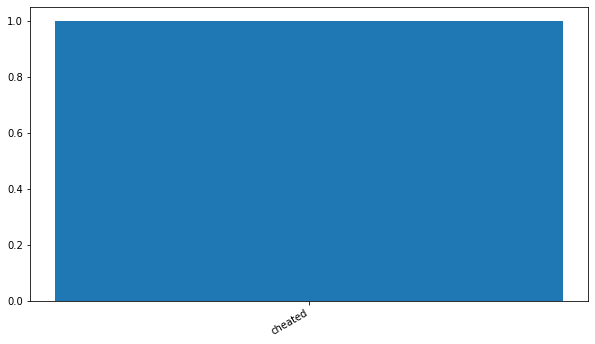

In [43]:
fig,ax=plt.subplots(figsize=(10,6))
ax.bar(w.keys(),w.values())
fig.autofmt_xdate()
plt.show()

In [44]:
sia.polarity_scores(cleaned)

{'neg': 0.054, 'neu': 0.847, 'pos': 0.1, 'compound': 0.9524}

# Task3:

In [55]:
s1= ['''This is the very first assignment for Natural Language Processing given to us. 
The objective is to create two documents and create a bag of words.''']

s2= ['''This is the second document of bag of words assignment. Lets apply the concepts of Natural Language 
Processing and count vectorizer taught in the class.''']

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
cvt=CountVectorizer(stop_words=stopwords.words('english'))
cvt.fit_transform(s1)
print(cvt.get_feature_names())

['assignment', 'bag', 'create', 'documents', 'first', 'given', 'language', 'natural', 'objective', 'processing', 'two', 'us', 'words']


In [61]:
cvt.vocabulary_

{'first': 4,
 'assignment': 0,
 'natural': 7,
 'language': 6,
 'processing': 9,
 'given': 5,
 'us': 11,
 'objective': 8,
 'create': 2,
 'two': 10,
 'documents': 3,
 'bag': 1,
 'words': 12}

In [62]:
cnew=cvt.transform(s2)
cnew=cnew.toarray()

In [63]:
import pandas as pd

In [64]:
rep=pd.DataFrame(cnew,columns=cvect.get_feature_names())
rep

,assignment,bag,create,documents,first,given,language,natural,objective,processing,two,us,words
0,1,1,0,0,0,0,1,1,0,1,0,0,1


In [65]:
cnew.sum()

6

In [66]:
cols=rep.columns
dic={}
for col in cols:
    if rep[col].sum()>=1:
        dic[col]=rep[col].sum()
print(dic)

{'assignment': 1, 'bag': 1, 'language': 1, 'natural': 1, 'processing': 1, 'words': 1}


In [67]:
len(dic.keys())

6